In [8]:
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score
from matplotlib import pyplot as plt

In [23]:
# Import train/test data
data_dir = '../data/processed/Annthyroid/iter1'
X_train = pd.read_csv(os.path.join(data_dir, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))
X_test = pd.read_csv(os.path.join(data_dir, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(data_dir, 'y_test.csv'))

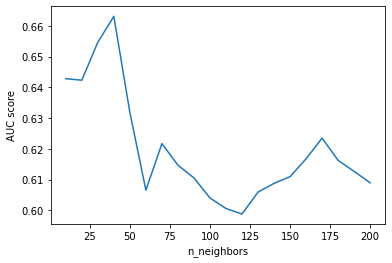

In [24]:
# Example 1
from pyod.models.lof import LOF
#
# Hyperpameters
n_neighbors = list(range(10,201,10))
auc_scores_1 = []
# loop
for n in n_neighbors:
    # Model
    clf1 = LOF(n_neighbors=n)
    # Training
    clf1.fit(X_train)
    # get the anomaly scores on the test data
    y_test_scores = clf1.decision_function(X_test)  # outlier scores
    auc_scores_1.append(roc_auc_score(y_test, y_test_scores))
plt.plot(n_neighbors, auc_scores_1)
plt.xlabel('n_neighbors')
plt.ylabel('AUC score')
plt.show()

In [26]:
# Example 2
#
n_estimators= list(range(5,201,5))
contamination = [0.05, 0.07, 0.1, 0.12, 0.15, 0.17, 0.2, 0.23, 0.25, 0.27, 0.3, 0.32, 0.35, 0.38, 0.4, 0.42, 0.45, 0.47, 0.5]
f1_scores_2 = [] # scores list
# loop
for n in n_estimators:
    # Temp scores
    temp_scores = []
    for c in contamination:
        # Model
        clf2 = LOF(n_neighbors=n, contamination=c)
        # Training
        clf2.fit(X_train)
        # get the anomaly scores on the test data
        # 
        y_pred = clf2.predict(X_test) # predictions
        temp_scores.append(f1_score(y_test, y_pred))
        #
    f1_scores_2.append(temp_scores)
# Plot heatmap
f1_scores_2_df = pd.DataFrame(f1_scores_2, index=n_neighbors, columns=contamination)
ax = sns.heatmap(f1_scores_2_df, cmap="YlGnBu")
ax.set_xlabel('contamination')
ax.set_ylabel('n_neighbors')

ValueError: Shape of passed values is (40, 19), indices imply (20, 19)

In [ ]:
# Example 3
from pyod.models.iforest import IForest
#
n_estimators= list(range(20,401,20))
max_features = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
auc_scores_3 = [] # scores list
# loop
for n in n_estimators:
    # Temp scores
    temp_scores = []
    for m in max_features:
        # Model
        clf3 = IForest(n_estimators=n, max_features=m)
        # Training
        clf3.fit(X_train)
        # get the anomaly scores on the test data
        y_test_scores = clf3.decision_function(X_test)  # outlier scores
        temp_scores.append(roc_auc_score(y_test, y_test_scores))
    auc_scores_3.append(temp_scores)
# Plot heatmap
auc_scores_3_df = pd.DataFrame(auc_scores_3, index=n_estimators, columns=max_features)
ax = sns.heatmap(auc_scores_3_df, cmap="YlGnBu")
ax.set_xlabel('max_feautres')
ax.set_ylabel('n_estimators')